**探索的データ分析授業前課題2 住宅情報の分析**


**【問題1】データセットの取得**

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl

In [2]:
drive.mount('/content/drive')
csv_path = "/content/drive/My Drive/Data/house-prices-advanced-regression-techniques/train.csv" # ファイル名（パス）を指定する

df = pd.read_csv(csv_path)

print(df)

Mounted at /content/drive
        Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
0        1          60       RL  ...        WD         Normal    208500
1        2          20       RL  ...        WD         Normal    181500
2        3          60       RL  ...        WD         Normal    223500
3        4          70       RL  ...        WD        Abnorml    140000
4        5          60       RL  ...        WD         Normal    250000
...    ...         ...      ...  ...       ...            ...       ...
1455  1456          60       RL  ...        WD         Normal    175000
1456  1457          20       RL  ...        WD         Normal    210000
1457  1458          70       RL  ...        WD         Normal    266500
1458  1459          20       RL  ...        WD         Normal    142125
1459  1460          20       RL  ...        WD         Normal    147500

[1460 rows x 81 columns]


**【問題2】データセット自体の調査**

**目的**

各住宅の最終価格を予測すること

**用意されたデータ**

アイオワ州エイムズの住宅の（ほぼ）すべての側面を説明する79の説明変数

**【問題3】データの確認**

*   各特徴量がどういったものかを見る。

各特徴量のラベル名とデータ型の一覧

In [3]:

# 最大表示数の設定
pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 0)

print(df.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


*   今回の目的変数はどの列か確認する。

今回の目的変数は「SalePrice」であり、ドルでの販売価格を表す

*   特徴量の平均値と標準偏差、四分位数を一度に表示させる。



In [4]:
# 特徴量の平均値と標準偏差、四分位数を一度に表示させる。
df_ave = df.mean()
df_ave.name = '平均値'

df_std = df.std(numeric_only=True)
df_std.name = '標準偏差'

df_quantile = df.quantile(0.25)
df_quantile.name = '四分位数'

print(pd.concat([df_ave, df_std, df_quantile], axis=1))

                         平均値          標準偏差       四分位数
Id                730.500000    421.610009     365.75
MSSubClass         56.897260     42.300571      20.00
LotFrontage        70.049958     24.284752      59.00
LotArea         10516.828082   9981.264932    7553.50
OverallQual         6.099315      1.382997       5.00
OverallCond         5.575342      1.112799       5.00
YearBuilt        1971.267808     30.202904    1954.00
YearRemodAdd     1984.865753     20.645407    1967.00
MasVnrArea        103.685262    181.066207       0.00
BsmtFinSF1        443.639726    456.098091       0.00
BsmtFinSF2         46.549315    161.319273       0.00
BsmtUnfSF         567.240411    441.866955     223.00
TotalBsmtSF      1057.429452    438.705324     795.75
1stFlrSF         1162.626712    386.587738     882.00
2ndFlrSF          346.992466    436.528436       0.00
LowQualFinSF        5.844521     48.623081       0.00
GrLivArea        1515.463699    525.480383    1129.50
BsmtFullBath        0.425342

**【問題4】欠損値への対応**

欠損値が何パーセント含まれるかを確認する。

In [5]:
# 欠損値が何パーセント含まれるかを確認する
def checkMissingValue(df):

    count_normal_val = 0
  
    for i in df.columns:

        count_err_val = df[i].isnull().sum()

        if not count_err_val == 0:
            
            print("■  " + i )
            print("欠損数:" + str(df[i].isnull().sum() )+
                     "　　欠損率:" + str((df[i].isnull().sum()/len(df)).round(3)))
                     # "    データの種類数:" + str(df[i].value_counts().count()))
            print("")
        else:
          count_normal_val += 1

    print("■  欠損値の含まれないラベル数  " + str(count_normal_val))

In [6]:
checkMissingValue(df)

■  LotFrontage
欠損数:259　　欠損率:0.177

■  Alley
欠損数:1369　　欠損率:0.938

■  MasVnrType
欠損数:8　　欠損率:0.005

■  MasVnrArea
欠損数:8　　欠損率:0.005

■  BsmtQual
欠損数:37　　欠損率:0.025

■  BsmtCond
欠損数:37　　欠損率:0.025

■  BsmtExposure
欠損数:38　　欠損率:0.026

■  BsmtFinType1
欠損数:37　　欠損率:0.025

■  BsmtFinType2
欠損数:38　　欠損率:0.026

■  Electrical
欠損数:1　　欠損率:0.001

■  FireplaceQu
欠損数:690　　欠損率:0.473

■  GarageType
欠損数:81　　欠損率:0.055

■  GarageYrBlt
欠損数:81　　欠損率:0.055

■  GarageFinish
欠損数:81　　欠損率:0.055

■  GarageQual
欠損数:81　　欠損率:0.055

■  GarageCond
欠損数:81　　欠損率:0.055

■  PoolQC
欠損数:1453　　欠損率:0.995

■  Fence
欠損数:1179　　欠損率:0.808

■  MiscFeature
欠損数:1406　　欠損率:0.963

■  欠損値の含まれないラベル数  62


5つ以上欠損値がある特徴量（列）は削除する。

In [7]:
n_thresh = df.shape[0] - 5

df.dropna(thresh=n_thresh, axis=1, inplace=True)

checkMissingValue(df)

■  Electrical
欠損数:1　　欠損率:0.001

■  欠損値の含まれないラベル数  62


**欠損値があるサンプル（行）は削除する。**

In [8]:
df.dropna(axis=0, how='any', inplace=True)

checkMissingValue(df)

■  欠損値の含まれないラベル数  63


**【問題5】用語の調査**

尖度（せんど）

尖度（せんど、英: kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す数字である。
正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、
尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。

歪度（わいど）

「歪度」とは、分布の歪み度合いを示すものです。 
正規分布のように左右対称であるのか、それとも片方の裾だけだ伸びたような歪んだ分布なのか、その度合いを示します。 
これを歪度（または歪度係数）といって、歪度が0 よりも大きければ右の裾が長い分布、
歪度が0 よりも小さければ左の裾が長い分布となります。


**【問題6】分布の確認**

seabornのsns.distplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


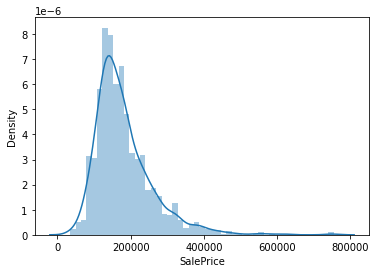

In [9]:
sns.distplot(df.SalePrice)

目的変数に対して対数変換を行う。

In [10]:
df_h = df.SalePrice.apply(np.log)

対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


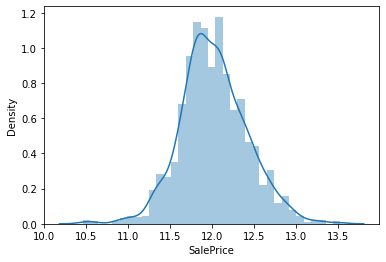

In [11]:
sns.distplot(df_h)

上記の分布図の通り、対数変換を行うことによって正規分布の形に近づく

**【問題7】相関係数の確認**

相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。

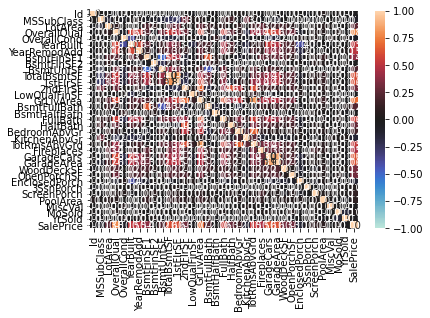

In [12]:
corr_mat = df.corr(method='pearson')

sns.heatmap(corr_mat,
            vmin=-1.0,
            vmax=1.0,
            center=0,
            annot=True, # True:格子の中に値を表示
            fmt='.1f',
            xticklabels=corr_mat.columns.values,
            yticklabels=corr_mat.columns.values
           )
plt.show()

目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。

In [13]:
# 引数は、相関係数を作成したいdf
def calc_corr(df):
    # 相関係数行列を作成
    corr_mat = df.corr(method='pearson')

    # 行（列）サイズを取得
    n = corr_mat.shape[0]

    # 項目名を取得
    columns = corr_mat.columns.tolist()

    # 変数名1, 変数名2, 値を一つの配列に入れたものを作成
    # 相関係数行列の下三角部分（対角成分除く）だけ
    corr_ary = []
    var1_ary = []
    var2_ary = []

    for i in range(n):
        for j in range(i):
            if i == j:
                continue
            corr_ary.append(corr_mat.iloc[i,j])
            var1_ary.append(columns[i])
            var2_ary.append(columns[j])

    # dfにする
    df_new = pd.DataFrame([])
    df_new["var1"] = var1_ary
    df_new["var2"] = var2_ary
    df_new["corr"] = corr_ary
    df_new = df_new.sort_values('corr', ascending=False)

    # カラムリストを作成

    return df_new

In [14]:
# 相関係数の高い順に10個の組み合わせを表示
aft_calc_corr_mat = calc_corr(df).head(10)
print(aft_calc_corr_mat)

             var1          var2      corr
299    GarageArea    GarageCars  0.882613
224  TotRmsAbvGrd     GrLivArea  0.825576
65       1stFlrSF   TotalBsmtSF  0.819393
564     SalePrice   OverallQual  0.791069
575     SalePrice     GrLivArea  0.708618
103     GrLivArea      2ndFlrSF  0.687726
229  TotRmsAbvGrd  BedroomAbvGr  0.676613
112  BsmtFullBath    BsmtFinSF1  0.649025
584     SalePrice    GarageCars  0.640473
150      FullBath     GrLivArea  0.630283


In [29]:
# var1とvar2の重複を削除
tmp_df = pd.concat([aft_calc_corr_mat.iloc[:,0], aft_calc_corr_mat.iloc[:,1]])

# 抽出したいラベル名のリスト
c = np.unique(tmp_df.values)

print(top_ten_labels)
print('')

# ラベル名リストのデータフレームを作成
new_corr_mat = corr_mat.drop(corr_mat.iloc[0:].index)

for k in top_ten_labels:
  new_corr_mat = new_corr_mat.append(corr_mat[corr_mat.index.str.contains(k)])

new_corr_mat = new_corr_mat.drop(new_corr_mat.iloc[][0:].index)
print(new_corr_mat)
for k in top_ten_labels:
  new_corr_mat = new_corr_mat.append(corr_mat[corr_mat.columns.str.contains(k)])

# new_corr_mat = corr_mat[corr_mat.index.str.contains('1stFlrSF')].append(corr_mat[corr_mat.index.str.contains('2ndFlrSF')])

# print(new_corr_mat)

SyntaxError: ignored

**相関係数の高いランキングTOP10は下記**

1.   駐車場の広さと車と駐車場の広さの比
2.   部屋の数とリビングの広さ
3.   1階の広さと地下室の広さ
4.   家の価格と総合素材・仕上がりの品質
5.   家の価格とリビングの広さ
6.   リビングの広さと2階の広さ
7.   部屋の数とベッドルームの数
8.   地下のバスルームと地下室の品質
9.   家の価格と車と駐車場の広さの比
10.  バスルームとリビングの広さ





